In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
from config import PGHOST, PGDATABASE, PGUSER, PGPASSWORD

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM

In [2]:
# Define a function to connect to AWS database instance

def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+PGHOST +" port="+ "5432" +" dbname="+PGDATABASE +" user=" + PGUSER \
                  +" password="+ PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [3]:
conn, cursor = connect()

Connected!


In [4]:
# Get the data, read SQL query into data frame
bb_data = pd.read_sql_query("SELECT * FROM blackberry", con=conn)
bb_df = pd.DataFrame(bb_data)
bb_df.head()

,Date,open_price,high_price,low_price,close_price,adj_close,volume
0,1999-02-04,2.145833,2.166667,1.895833,1.924479,1.924479,16788600
1,1999-02-05,1.929688,1.947917,1.822917,1.833333,1.833333,3053400
2,1999-02-08,1.854167,1.927083,1.783854,1.812500,1.812500,1548000
3,1999-02-09,1.822917,1.833333,1.656250,1.666667,1.666667,3501600
4,1999-02-10,1.708333,1.708333,1.604167,1.677083,1.677083,1597200


In [5]:
# Get the data, read SQL query into data frame
gg_data = pd.read_sql_query("SELECT * FROM google", con=conn)
gg_df = pd.DataFrame(gg_data)
gg_df.head()

,Date,open_price,high_price,low_price,close_price,adj_close,volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044


In [6]:
# Get the data, read SQL query into data frame
nf_data = pd.read_sql_query("SELECT * FROM netflix", con=conn)
nf_df = pd.DataFrame(nf_data)
nf_df.head()

,Date,open_price,high_price,low_price,close_price,adj_close,volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [7]:
# Check the rows and columns of dfs
print(bb_df.shape)
print(gg_df.shape)
print(nf_df.shape)

(5945, 7)
(4553, 7)
(5117, 7)


In [8]:
# Check if there is null values
bb_df.isnull().sum()

Date           0
open_price     0
high_price     0
low_price      0
close_price    0
adj_close      0
volume         0
dtype: int64

In [9]:
# Check the data types in df
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5945 non-null   object 
 1   open_price   5945 non-null   float64
 2   high_price   5945 non-null   float64
 3   low_price    5945 non-null   float64
 4   close_price  5945 non-null   float64
 5   adj_close    5945 non-null   float64
 6   volume       5945 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 325.2+ KB


In [10]:
gg_df.isnull().sum()

Date           0
open_price     0
high_price     0
low_price      0
close_price    0
adj_close      0
volume         0
dtype: int64

In [11]:
gg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4553 non-null   object 
 1   open_price   4553 non-null   float64
 2   high_price   4553 non-null   float64
 3   low_price    4553 non-null   float64
 4   close_price  4553 non-null   float64
 5   adj_close    4553 non-null   float64
 6   volume       4553 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 249.1+ KB


In [12]:
nf_df.isnull().sum()

Date           0
open_price     0
high_price     0
low_price      0
close_price    0
adj_close      0
volume         0
dtype: int64

In [13]:
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117 entries, 0 to 5116
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5117 non-null   object 
 1   open_price   5117 non-null   float64
 2   high_price   5117 non-null   float64
 3   low_price    5117 non-null   float64
 4   close_price  5117 non-null   float64
 5   adj_close    5117 non-null   float64
 6   volume       5117 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 280.0+ KB


In [14]:
# Change [Date] data type to data time

bb_df['Date'] = pd.to_datetime(bb_df.Date)
gg_df['Date'] = pd.to_datetime(gg_df.Date)
nf_df['Date'] = pd.to_datetime(nf_df.Date)

In [15]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5945 non-null   datetime64[ns]
 1   open_price   5945 non-null   float64       
 2   high_price   5945 non-null   float64       
 3   low_price    5945 non-null   float64       
 4   close_price  5945 non-null   float64       
 5   adj_close    5945 non-null   float64       
 6   volume       5945 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 325.2 KB


In [16]:
gg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4553 non-null   datetime64[ns]
 1   open_price   4553 non-null   float64       
 2   high_price   4553 non-null   float64       
 3   low_price    4553 non-null   float64       
 4   close_price  4553 non-null   float64       
 5   adj_close    4553 non-null   float64       
 6   volume       4553 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 249.1 KB


In [17]:
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117 entries, 0 to 5116
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5117 non-null   datetime64[ns]
 1   open_price   5117 non-null   float64       
 2   high_price   5117 non-null   float64       
 3   low_price    5117 non-null   float64       
 4   close_price  5117 non-null   float64       
 5   adj_close    5117 non-null   float64       
 6   volume       5117 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 280.0 KB


In [18]:
# Drop 'Adj Close' column

bb_df = bb_df.drop('adj_close', axis=1)
gg_df = gg_df.drop('adj_close', axis=1)
nf_df = nf_df.drop('adj_close', axis=1)

In [19]:
# Set date as index of data frame

bb_df.set_index('Date')
gg_df.set_index('Date')
nf_df.set_index('Date')

,open_price,high_price,low_price,close_price,volume
Date,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200
...,...,...,...,...,...
2022-09-13,226.500000,227.690000,217.720000,218.130000,8000100
2022-09-14,219.820000,228.000000,215.800000,224.120000,8230300
2022-09-15,230.470000,242.290000,229.100000,235.380000,19454100


In [20]:
# Add stock name column into data Frame
bb_df['stock_name'] = 'BlackBerry'
gg_df['stock_name'] = 'Google'
nf_df['stock_name'] = 'NetFlix'

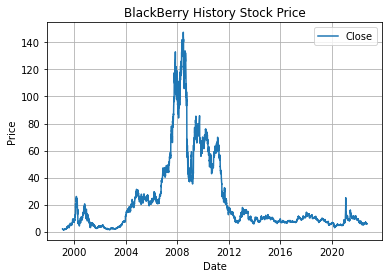

In [21]:
# Vistulize the stock price trend by using 'Close' column
plt.plot(bb_df['Date'], bb_df['close_price'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"{bb_df['stock_name'][0]} History Stock Price")
plt.grid()
plt.legend()
plt.show()

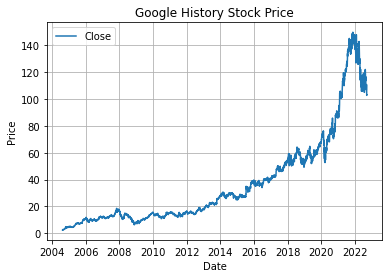

In [22]:
# Vistulize the stock price trend by using 'Close' column
plt.plot(gg_df['Date'], gg_df['close_price'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"{gg_df['stock_name'][0]} History Stock Price")
plt.grid()
plt.legend()
plt.show()

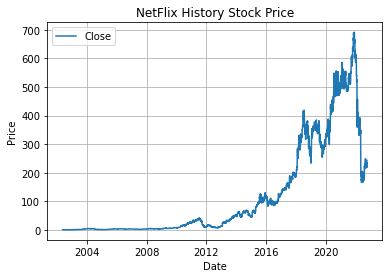

In [23]:
# Vistulize the stock price trend by using 'Close' column
plt.plot(nf_df['Date'], nf_df['close_price'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"{nf_df['stock_name'][0]} History Stock Price")
plt.grid()
plt.legend()
plt.show()

# Multiple Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
# Using BlackBerry stock as example to build MLR model
# Split our preprocessed data into our features and target arrays

X = bb_df[['open_price','high_price','low_price','volume']].values
y = bb_df['close_price'].values

In [26]:
# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [27]:
# Check the shape of X_train and X_test

print(X_train.shape)
print(X_test.shape)

(4458, 4)
(1487, 4)


In [28]:
# Build linear reg model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Check the model score

lr_model.score(X_train, y_train)

0.9997635230910699

In [30]:
# Make stock price prediction

prediction = lr_model.predict(X_test)

print(prediction.shape)
print(prediction)

(1487,)
[ 7.07024107  9.91884785 62.05358664 ...  2.62858694 20.86661344
 22.28151238]


In [31]:
# Compare y_test and our prediction value

pred_df = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':prediction})

pred_df.head()

,Actual Price,Predicted Price
0,7.05,7.070241
1,9.88,9.918848
2,62.41,62.053587
3,7.43,7.441019
4,21.63,21.906761


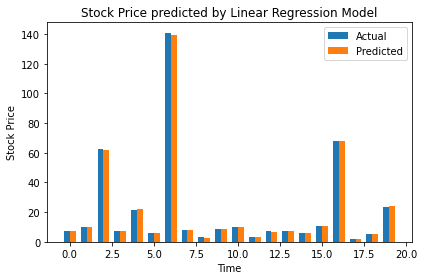

In [32]:
# Plot the actual and predicted price
# from the above data frame, we can see the difference between 'actual price' and 'predicted price' is tiny
# if using line graph, the two lines will be overlapped to each other.
# so we choose to use bar graph to show the difference of first 20 rows of data frame

fig_df = pred_df.loc[pred_df.index<20]

x = np.arange(len(fig_df['Actual Price']))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fig_df['Actual Price'], width, label='Actual')
rects2 = ax.bar(x + width/2, fig_df['Predicted Price'], width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price predicted by Linear Regression Model')
ax.legend()
fig.tight_layout()
plt.show()

In [33]:
print(lr_model.coef_)
print(lr_model.intercept_)

[-6.04633013e-01  8.49151347e-01  7.54209287e-01 -1.14024046e-09]
-0.0010973939316194503


In [34]:
# Calculate the MSE for our model
# The mean squared error (MSE) tells you how close a regression line is to a set of points
# return a non-negative floating point value (the best value is 0.0)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

0.22175367673634705

# Using LSTM model to predict  stock price

In [41]:
# Define a function to do the model train and test

def stock_prediction(df):
    # Choose "Closed" price column as our input variable
    close_df= pd.DataFrame(df['close_price'])
    
    # Use the previous 30 days 'close' price to predict the 31st day's price
    previous_days = 30
    
    data_len = round(len(close_df) * 0.8)

    close_df_train = close_df.loc[close_df.index < data_len]
    close_df_test = close_df.loc[close_df.index >= data_len]
    # Scale the training data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data_train = scaler.fit_transform(close_df_train.values.reshape(-1,1))
    scaled_data_test = scaler.fit_transform(close_df_test.values.reshape(-1,1))
    
    # Splite data into X_train and y_train
    X_train = []
    y_train = []
    X_test = []
    y_test = close_df_test[previous_days:]

    for i in range(previous_days, len(scaled_data_train)):
        X_train.append(scaled_data_train[i-previous_days:i, 0])
        y_train.append(scaled_data_train[i, 0])

    for i in range(previous_days, len(scaled_data_test)):
        X_test.append(scaled_data_test[i-previous_days:i, 0])

    # Convert the X_train and y_train to numpy arrays
    X_train, y_train, X_test = np.array(X_train), np.array(y_train), np.array(X_test)
    
    # Reshape the X_train since LSTM needs 3-dimensional inputs
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Build the LSTM model
    model = Sequential()
    # Add LSTM layer
    model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
    model.add(LSTM(units = 50, return_sequences=True))
    model.add(LSTM(units = 50))
    # prediction output layer
    model.add(Dense(units=1))
    
    # compile and train the data
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size =32, epochs=20)
     
   
    # Predict the data
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    # plot test predictions
    y_test['pred'] = prediction
    #y_test.head()
    plt.figure(figsize=(12, 8))
    plt.plot(close_df_train)
    plt.plot(y_test[['close_price','pred']])
    plt.xlabel('Date')
    plt.ylabel('Close Price US$')
    plt.title(f"{df['stock_name'][0]} Stock Price predicted by LSTM Model")
    plt.grid()
    plt.legend(['Train', 'Test', 'Prediction'])
    plt.show()
    
    return model.summary()

Epoch 1/20
148/148 [==============================] - 10s 28ms/step - loss: 0.0029
Epoch 2/20
148/148 [==============================] - 4s 28ms/step - loss: 8.4564e-04
Epoch 3/20
148/148 [==============================] - 4s 27ms/step - loss: 6.4230e-04
Epoch 4/20
148/148 [==============================] - 4s 27ms/step - loss: 5.1012e-04
Epoch 5/20
148/148 [==============================] - 4s 28ms/step - loss: 4.8711e-04
Epoch 6/20
148/148 [==============================] - 4s 27ms/step - loss: 4.6405e-04
Epoch 7/20
148/148 [==============================] - 4s 28ms/step - loss: 3.2664e-04
Epoch 8/20
148/148 [==============================] - 4s 27ms/step - loss: 2.9618e-04
Epoch 9/20
148/148 [==============================] - 4s 27ms/step - loss: 2.8267e-04
Epoch 10/20
148/148 [==============================] - 4s 29ms/step - loss: 2.4826e-04
Epoch 11/20
148/148 [==============================] - 4s 28ms/step - loss: 2.7572e-04
Epoch 12/20
148/148 [==============================] - 

C:\Users\ivorf\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


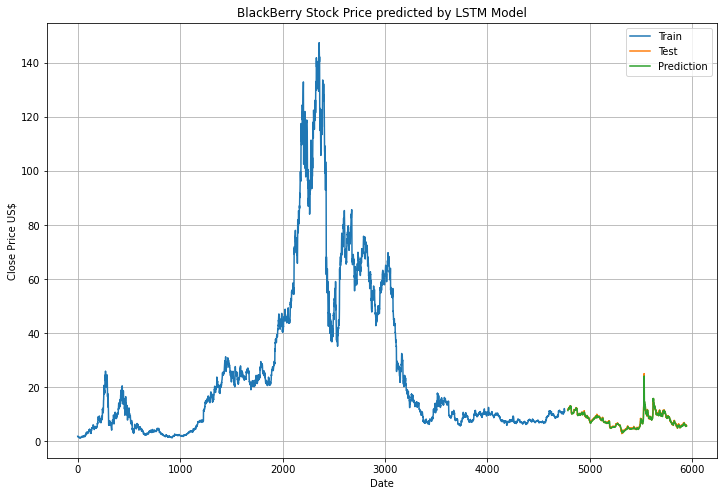

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
stock_prediction(bb_df)

Epoch 1/20
113/113 [==============================] - 9s 28ms/step - loss: 0.0099
Epoch 2/20
113/113 [==============================] - 3s 28ms/step - loss: 3.6279e-04
Epoch 3/20
113/113 [==============================] - 3s 28ms/step - loss: 3.6179e-04
Epoch 4/20
113/113 [==============================] - 3s 28ms/step - loss: 4.1969e-04
Epoch 5/20
113/113 [==============================] - 3s 28ms/step - loss: 3.5007e-04
Epoch 6/20
113/113 [==============================] - 3s 28ms/step - loss: 3.1853e-04
Epoch 7/20
113/113 [==============================] - 3s 28ms/step - loss: 3.2790e-04
Epoch 8/20
113/113 [==============================] - 3s 28ms/step - loss: 3.1933e-04
Epoch 9/20
113/113 [==============================] - 3s 28ms/step - loss: 3.0518e-04
Epoch 10/20
113/113 [==============================] - 3s 28ms/step - loss: 2.8056e-04
Epoch 11/20
113/113 [==============================] - 3s 28ms/step - loss: 3.2174e-04
Epoch 12/20
113/113 [==============================] - 3

C:\Users\ivorf\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


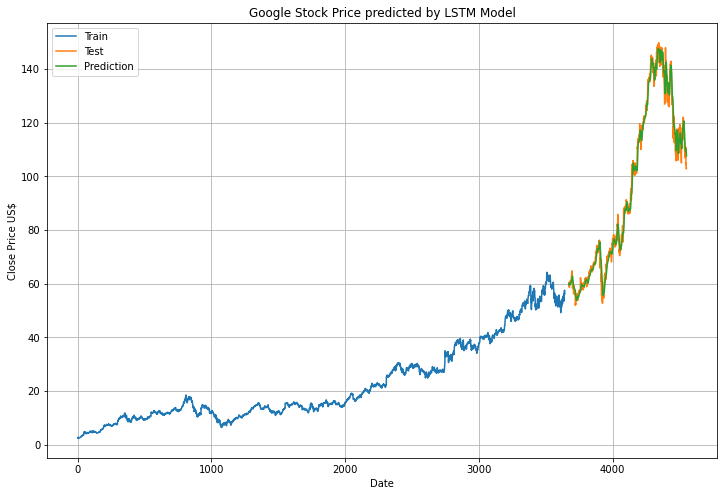

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 50)            10400     
                                                                 
 lstm_13 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
stock_prediction(gg_df)

Epoch 1/20
127/127 [==============================] - 7s 22ms/step - loss: 0.0014
Epoch 2/20
127/127 [==============================] - 3s 22ms/step - loss: 3.9388e-04
Epoch 3/20
127/127 [==============================] - 3s 21ms/step - loss: 3.0594e-04
Epoch 4/20
127/127 [==============================] - 3s 22ms/step - loss: 2.5541e-04
Epoch 5/20
127/127 [==============================] - 3s 21ms/step - loss: 2.3348e-04
Epoch 6/20
127/127 [==============================] - 3s 21ms/step - loss: 3.7877e-04
Epoch 7/20
127/127 [==============================] - 3s 21ms/step - loss: 1.5929e-04
Epoch 8/20
127/127 [==============================] - 3s 21ms/step - loss: 1.6871e-04
Epoch 9/20
127/127 [==============================] - 3s 21ms/step - loss: 1.7158e-04
Epoch 10/20
127/127 [==============================] - 3s 21ms/step - loss: 1.6575e-04
Epoch 11/20
127/127 [==============================] - 3s 22ms/step - loss: 1.3141e-04
Epoch 12/20
127/127 [==============================] - 3

C:\Users\ivorf\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


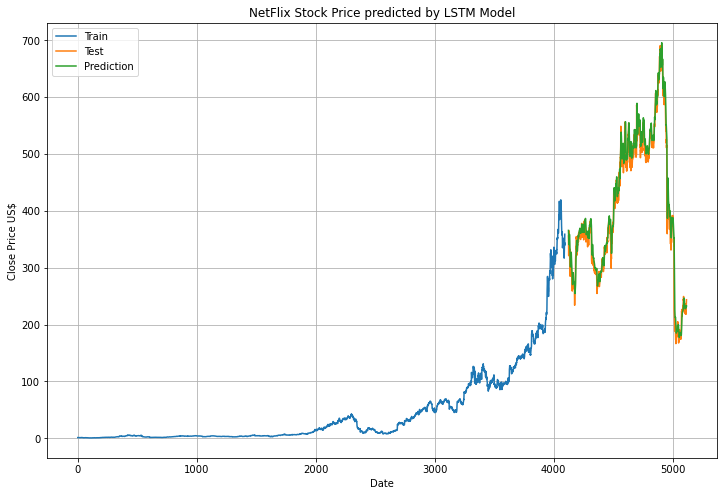

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:
stock_prediction(nf_df)